# Lecture 6 - R packages and project introduction

1. R package - dplyr & ggplot2
2. Project introduction

In [1]:
l= seq(2,12)
l

[1]  2  3  4  5  6  7  8  9 10 11 12

## R pakcages

For data manipulation/wrangling, two of the most important pakcages are __dplyr__ and __ggplot2__.  数据 和 画图

### dplyr

#### What is dplyr?  数据整理  主要用于table

The dplyr is a powerful R-package to manipulate, clean and summarize unstructured data. In short, it makes data exploration and data manipulation easy and fast in R.

The package "dplyr" comprises many functions that perform mostly used data manipulation operations such as applying filter, selecting specific columns, sorting data, adding or deleting columns and aggregating data. Another most important advantage of this package is that it's very easy to learn and use dplyr functions. Also easy to recall these functions. For example, filter() is used to filter rows.

In [7]:
require(dplyr) # 开始操作之前一定要调出 这个dplyr包
library(dplyr)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [37]:
# install.packages('dplyr')
require(dplyr)

#### Important dplyr functions

In [2]:
install.packages('ggplot2')

Installing package into 'C:/Users/kongg/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kongg\AppData\Local\Temp\RtmpGyYreZ\downloaded_packages


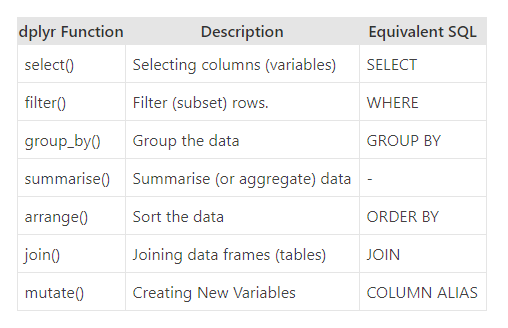

#### SQL vs dplyr

Every modern data analysis software such as Python, R, SAS etc supports SQL commands. But SQL was never designed to perform data analysis. It was rather designed for querying and managing data. There are many data analysis operations where SQL fails or makes simple things difficult. For example, calculating median for multiple variables, converting wide format data to long format etc. Whereas, dplyr package was designed to do data analysis.

#### Import sample data

In [ ]:
拿到数据之后基本上就是这样的顺序，首先清洗处理数据，产生更多有用的变量

In [2]:
mydata = read.csv("https://raw.githubusercontent.com/deepanshu88/data/master/sampledata.csv")

In [3]:
head(mydata)

Index,State,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A,Alabama,1296530,1317711,1118631,1492583,1107408,1440134,1945229,1944173,1237582,1440756,1186741,1852841,1558906,1916661
A,Alaska,1170302,1960378,1818085,1447852,1861639,1465841,1551826,1436541,1629616,1230866,1512804,1985302,1580394,1979143
A,Arizona,1742027,1968140,1377583,1782199,1102568,1109382,1752886,1554330,1300521,1130709,1907284,1363279,1525866,1647724
A,Arkansas,1485531,1994927,1119299,1947979,1669191,1801213,1188104,1628980,1669295,1928238,1216675,1591896,1360959,1329341
C,California,1685349,1675807,1889570,1480280,1735069,1812546,1487315,1663809,1624509,1639670,1921845,1156536,1388461,1644607
C,Colorado,1343824,1878473,1886149,1236697,1871471,1814218,1875146,1752387,1913275,1665877,1491604,1178355,1383978,1330736


In [41]:
# check number of columns and rows  查看行数和列数
dim(mydata)  

[1] 51 16

In [42]:
# view the structure of the dataset  看数据的格式
str(mydata)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

'data.frame':	51 obs. of  16 variables:
 $ Index: Factor w/ 19 levels "A","C","D","F",..: 1 1 1 1 2 2 2 3 3 4 ...
 $ State: Factor w/ 51 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Y2002: int  1296530 1170302 1742027 1485531 1685349 1343824 1610512 1330403 1111437 1964626 ...
 $ Y2003: int  1317711 1960378 1968140 1994927 1675807 1878473 1232844 1268673 1993741 1468852 ...
 $ Y2004: int  1118631 1818085 1377583 1119299 1889570 1886149 1181949 1706751 1374643 1419738 ...
 $ Y2005: int  1492583 1447852 1782199 1947979 1480280 1236697 1518933 1403759 1827949 1362787 ...
 $ Y2006: int  1107408 1861639 1102568 1669191 1735069 1871471 1841266 1441351 1803852 1339608 ...
 $ Y2007: int  1440134 1465841 1109382 1801213 1812546 1814218 1976976 1300836 1595981 1278550 ...
 $ Y2008: int  1945229 1551826 1752886 1188104 1487315 1875146 1764457 1762096 1193245 1756185 ...
 $ Y2009: int  1944173 1436541 1554330 1628980 1663809 1752387 1972730 1553585 1739748 1818438 ...
 $ Y2010: int  1

In [43]:
# give a summary of variables  对每一列进行计算
summary(mydata)  

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

     Index           State        Y2002             Y2003        
 M      : 8   Alabama   : 1   Min.   :1111437   Min.   :1110625  
 N      : 8   Alaska    : 1   1st Qu.:1374180   1st Qu.:1292391  
 A      : 4   Arizona   : 1   Median :1584734   Median :1485909  
 I      : 4   Arkansas  : 1   Mean   :1566034   Mean   :1509193  
 W      : 4   California: 1   3rd Qu.:1776054   3rd Qu.:1686698  
 C      : 3   Colorado  : 1   Max.   :1983285   Max.   :1994927  
 (Other):20   (Other)   :45                                      
     Y2004             Y2005             Y2006             Y2007        
 Min.   :1118631   Min.   :1122030   Min.   :1102568   Min.   :1109382  
 1st Qu.:1268292   1st Qu.:1267340   1st Qu.:1337236   1st Qu.:1322419  
 Median :1522230   Median :1480280   Median :1531641   Median :1563062  
 Mean   :1540555   Mean   :1522064   Mean   :1530969   Mean   :1553219  
 3rd Qu.:1808109   3rd Qu.:1778171   3rd Qu.:1732259   3rd Qu.:1780589  
 Max.   :1979395   Max.   :1990062

In [44]:
# frequency table of states   每个州出现的次数
table(mydata$State)


             Alabama               Alaska              Arizona 
                   1                    1                    1 
            Arkansas           California             Colorado 
                   1                    1                    1 
         Connecticut             Delaware District of Columbia 
                   1                    1                    1 
             Florida              Georgia               Hawaii 
                   1                    1                    1 
               Idaho             Illinois              Indiana 
                   1                    1                    1 
                Iowa               Kansas             Kentucky 
                   1                    1                    1 
           Louisiana                Maine             Maryland 
                   1                    1                    1 
       Massachusetts             Michigan            Minnesota 
                   1                   

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

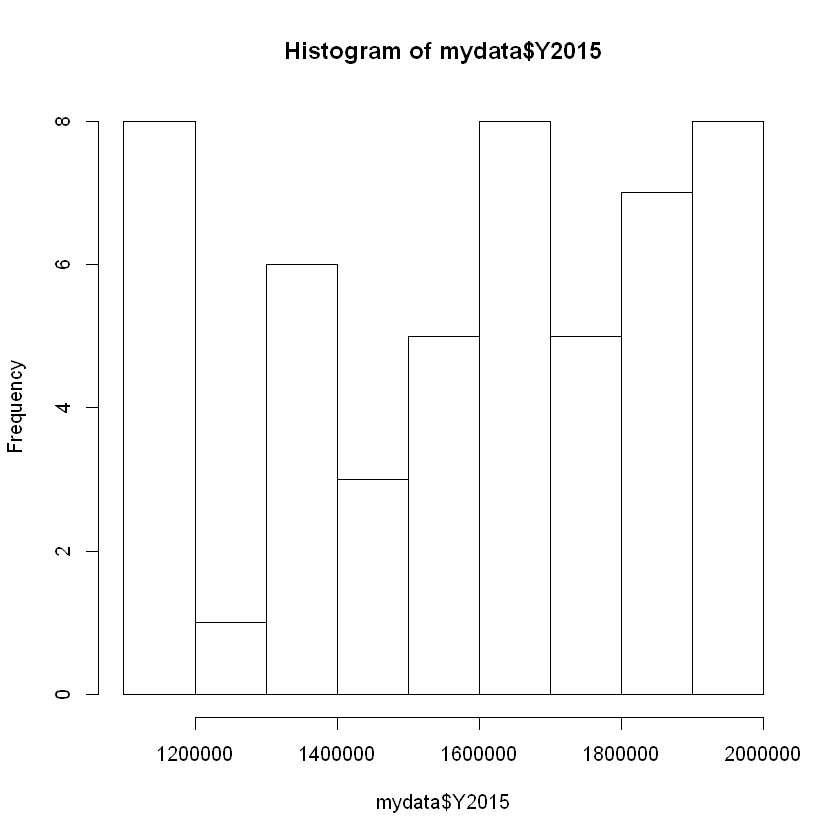

In [6]:
# plot one year of income  画图函数  直方图
hist(mydata$Y2015)

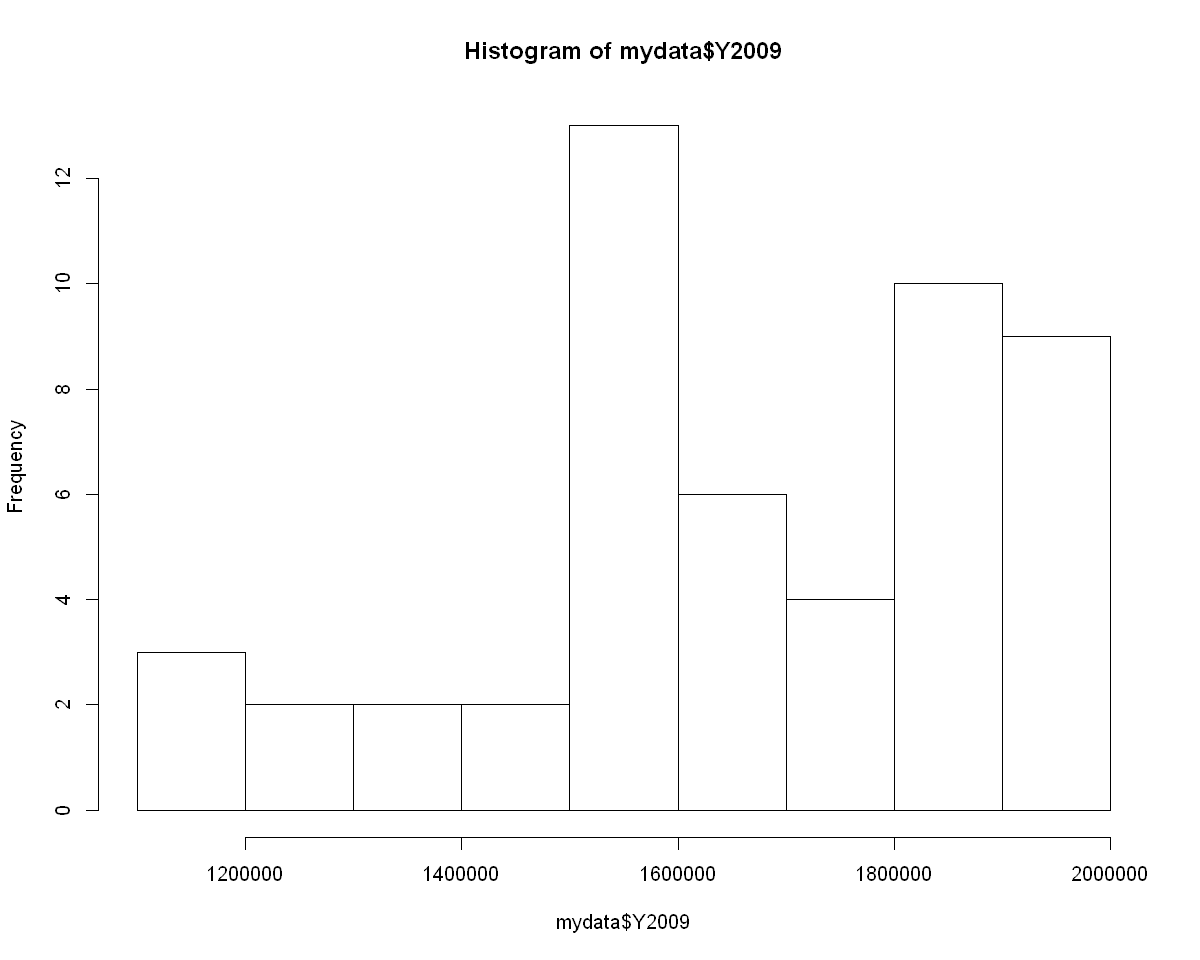

In [46]:
#画直方图
hist(mydata$Y2009)

#### Selecting Random N Rows

The sample_n function selects random rows from a data frame (or table). The second parameter of the function tells R the number of rows to select.

In [7]:
sample_n(mydata,3)  #随机抽取  这里随机抽取3行

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Index,State,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
M,Mississippi,1983285,1292558,1631325,1943311,1354579,1731643,1428291,1568049,1383227,1629132,1988270,1907777,1649668,1991232
C,California,1685349,1675807,1889570,1480280,1735069,1812546,1487315,1663809,1624509,1639670,1921845,1156536,1388461,1644607
O,Oregon,1794912,1726665,1805445,1133510,1502242,1419251,1482786,1862351,1103794,1935687,1905378,1522129,1509171,1893515


In [8]:
sample_n(mydata,10)  # 随机抽取10行

Index,State,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
O,Oregon,1794912,1726665,1805445,1133510,1502242,1419251,1482786,1862351,1103794,1935687,1905378,1522129,1509171,1893515
W,Wisconsin,1788920,1518578,1289663,1436888,1251678,1721874,1980167,1901394,1648755,1940943,1729177,1510119,1701650,1846238
T,Texas,1520591,1310777,1957713,1907326,1873544,1655483,1785986,1827503,1447457,1978374,1882532,1698698,1646508,1705322
G,Georgia,1929009,1541565,1810773,1779091,1326846,1223770,1773090,1630325,1145473,1851245,1850111,1887157,1259353,1725470
P,Pennsylvania,1320191,1446723,1218591,1122030,1971479,1563062,1274168,1571032,1433835,1483292,1290329,1475344,1931500,1668232
F,Florida,1964626,1468852,1419738,1362787,1339608,1278550,1756185,1818438,1198403,1497051,1131928,1107448,1407784,1170389
N,Nevada,1426117,1114500,1119707,1758830,1694526,1765826,1903270,1231480,1526066,1143343,1980195,1283813,1225348,1903804
D,Delaware,1330403,1268673,1706751,1403759,1441351,1300836,1762096,1553585,1370984,1318669,1984027,1671279,1803169,1627508
H,Hawaii,1461570,1200280,1213993,1245931,1459383,1430465,1919423,1928416,1330509,1902816,1695126,1517184,1948108,1150882


#### Selecting Random Fraction of Rows

The sample_frac function returns randomly N% of rows. In the example below, it returns randomly 10% of rows.

In [9]:
#按百分比抽样
sample_frac(mydata,0.1)

Index,State,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
M,Missouri,1221316,1858368,1773451,1573967,1374863,1486197,1735099,1800620,1164202,1425363,1800052,1698105,1767835,1996005
W,Wisconsin,1788920,1518578,1289663,1436888,1251678,1721874,1980167,1901394,1648755,1940943,1729177,1510119,1701650,1846238
N,New Mexico,1819239,1226057,1935991,1124400,1723493,1475985,1237704,1820856,1801430,1653384,1475715,1623388,1533494,1868612
K,Kentucky,1813878,1448846,1800760,1250524,1137913,1911227,1301848,1956681,1350895,1512894,1916616,1878271,1722762,1913350
T,Tennessee,1811867,1485909,1974179,1157059,1786132,1399191,1826406,1326460,1231739,1469785,1849041,1560887,1349173,1162164


#### Remove Duplicate Rows based on all the variables (Complete Row)

In [49]:
#去重复
x1 = distinct(mydata)  

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

#### Remove Duplicate Rows based on a variable

The .keep_all function is used to retain all other variables in the output data frame.

In [50]:
x2 = distinct(mydata, Index, .keep_all= TRUE)
dim(x2) # check number of columns and rows  查看行数和列数
head(x2) #查看数据

[1] 19 16

Index,State,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A,Alabama,1296530,1317711,1118631,1492583,1107408,1440134,1945229,1944173,1237582,1440756,1186741,1852841,1558906,1916661
C,California,1685349,1675807,1889570,1480280,1735069,1812546,1487315,1663809,1624509,1639670,1921845,1156536,1388461,1644607
D,Delaware,1330403,1268673,1706751,1403759,1441351,1300836,1762096,1553585,1370984,1318669,1984027,1671279,1803169,1627508
F,Florida,1964626,1468852,1419738,1362787,1339608,1278550,1756185,1818438,1198403,1497051,1131928,1107448,1407784,1170389
G,Georgia,1929009,1541565,1810773,1779091,1326846,1223770,1773090,1630325,1145473,1851245,1850111,1887157,1259353,1725470
H,Hawaii,1461570,1200280,1213993,1245931,1459383,1430465,1919423,1928416,1330509,1902816,1695126,1517184,1948108,1150882


#### Remove Duplicates Rows based on multiple variables

In the example below, we are using two variables - Index, Y2010 to determine uniqueness.

In [11]:
x2 = distinct(mydata, Index, Y2010, .keep_all= TRUE)
dim(x2)# check number of columns and rows  查看行数和列数
head(x2)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] 51 16

Index,State,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A,Alabama,1296530,1317711,1118631,1492583,1107408,1440134,1945229,1944173,1237582,1440756,1186741,1852841,1558906,1916661
A,Alaska,1170302,1960378,1818085,1447852,1861639,1465841,1551826,1436541,1629616,1230866,1512804,1985302,1580394,1979143
A,Arizona,1742027,1968140,1377583,1782199,1102568,1109382,1752886,1554330,1300521,1130709,1907284,1363279,1525866,1647724
A,Arkansas,1485531,1994927,1119299,1947979,1669191,1801213,1188104,1628980,1669295,1928238,1216675,1591896,1360959,1329341
C,California,1685349,1675807,1889570,1480280,1735069,1812546,1487315,1663809,1624509,1639670,1921845,1156536,1388461,1644607
C,Colorado,1343824,1878473,1886149,1236697,1871471,1814218,1875146,1752387,1913275,1665877,1491604,1178355,1383978,1330736


#### select( ) Function  作用于列

It is used to select only desired variables.

#### Selecting Variables (or Columns)

Suppose you are asked to select only a few variables. The code below selects variables "Index", columns from "State" to "Y2008".

In [12]:
mydata2 = select(mydata, Index, State:Y2008)  #选择数据

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

#### Dropping Variables

The minus sign before a variable tells R to drop the variable.

In [13]:
mydata3 = select(mydata, -Index, -State)  # - 意思是去掉这一列
mydata3 = select(mydata, -c(Index,State))

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

#### Selecting or Dropping Variables starts with 'Y'

The starts_with() function is used to select variables starts with an alphabet.

In [54]:
mydata3 = select(mydata, starts_with("Y"))  #  mydata3 新的数据从mydata里面选择 但是只选取以Y开头的列

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Adding a negative sign before starts_with() implies dropping the variables starts with 'Y'

In [55]:
mydata33 = select(mydata, -starts_with("Y"))

The following functions helps you to select variables based on their names.

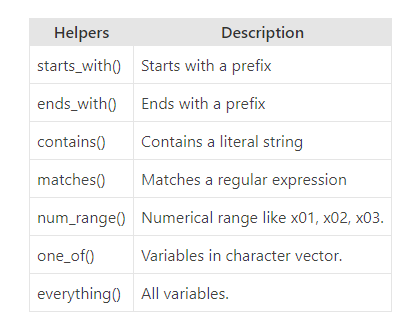

#### Selecting Variables contain 'I' in their names

In [3]:
mydata4 = select(mydata, contains("I"))  # 选择包含 I 的列  

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

ERROR: Error in select(mydata, contains("I")): object 'mydata' not found


#### Reorder Variables

The code below keeps variable 'State' in the front and the remaining variables follow that.

In [57]:
mydata5 = select(mydata, State, everything())
names(mydata5)

[1] "State" "Index" "Y2002" "Y2003" "Y2004" "Y2005" "Y2006" "Y2007" "Y2008"
[10] "Y2009" "Y2010" "Y2011" "Y2012" "Y2013" "Y2014" "Y2015"

#### rename( ) Function  更改变量名称

It is used to change variable name.

#### Rename Variables

n the following code, we are renaming 'Index' variable to 'Index1'.

In [16]:
mydata6 = rename(mydata, Index1=Index) #重新命名  但是不会更改原来数据库的列的名字mydata没有改变，只是产生一个新的mydata table
mydata6
rename(mydata, Index1=Index)  #等同于上面，只是没有赋值，直接打印出来了

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Index1,State,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A,Alabama,1296530,1317711,1118631,1492583,1107408,1440134,1945229,1944173,1237582,1440756,1186741,1852841,1558906,1916661
A,Alaska,1170302,1960378,1818085,1447852,1861639,1465841,1551826,1436541,1629616,1230866,1512804,1985302,1580394,1979143
A,Arizona,1742027,1968140,1377583,1782199,1102568,1109382,1752886,1554330,1300521,1130709,1907284,1363279,1525866,1647724
A,Arkansas,1485531,1994927,1119299,1947979,1669191,1801213,1188104,1628980,1669295,1928238,1216675,1591896,1360959,1329341
C,California,1685349,1675807,1889570,1480280,1735069,1812546,1487315,1663809,1624509,1639670,1921845,1156536,1388461,1644607
C,Colorado,1343824,1878473,1886149,1236697,1871471,1814218,1875146,1752387,1913275,1665877,1491604,1178355,1383978,1330736
C,Connecticut,1610512,1232844,1181949,1518933,1841266,1976976,1764457,1972730,1968730,1945524,1228529,1582249,1503156,1718072
D,Delaware,1330403,1268673,1706751,1403759,1441351,1300836,1762096,1553585,1370984,1318669,1984027,1671279,1803169,1627508
D,District of Columbia,1111437,1993741,1374643,1827949,1803852,1595981,1193245,1739748,1707823,1353449,1979708,1912654,1782169,1410183


Index1,State,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A,Alabama,1296530,1317711,1118631,1492583,1107408,1440134,1945229,1944173,1237582,1440756,1186741,1852841,1558906,1916661
A,Alaska,1170302,1960378,1818085,1447852,1861639,1465841,1551826,1436541,1629616,1230866,1512804,1985302,1580394,1979143
A,Arizona,1742027,1968140,1377583,1782199,1102568,1109382,1752886,1554330,1300521,1130709,1907284,1363279,1525866,1647724
A,Arkansas,1485531,1994927,1119299,1947979,1669191,1801213,1188104,1628980,1669295,1928238,1216675,1591896,1360959,1329341
C,California,1685349,1675807,1889570,1480280,1735069,1812546,1487315,1663809,1624509,1639670,1921845,1156536,1388461,1644607
C,Colorado,1343824,1878473,1886149,1236697,1871471,1814218,1875146,1752387,1913275,1665877,1491604,1178355,1383978,1330736
C,Connecticut,1610512,1232844,1181949,1518933,1841266,1976976,1764457,1972730,1968730,1945524,1228529,1582249,1503156,1718072
D,Delaware,1330403,1268673,1706751,1403759,1441351,1300836,1762096,1553585,1370984,1318669,1984027,1671279,1803169,1627508
D,District of Columbia,1111437,1993741,1374643,1827949,1803852,1595981,1193245,1739748,1707823,1353449,1979708,1912654,1782169,1410183


#### filter( ) Function   对行进行操作  作用于行

It is used to subset data with matching logical conditions.

#### Filter Rows

Suppose you need to subset data. You want to filter rows and retain only those values in which Index is equal to A.

In [15]:
mydata7 = filter(mydata, Index == "A")  # 判断是 ==  两个等号，选择满足条件的行，赋值到mydata7里面
mydata7

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Index,State,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A,Alabama,1296530,1317711,1118631,1492583,1107408,1440134,1945229,1944173,1237582,1440756,1186741,1852841,1558906,1916661
A,Alaska,1170302,1960378,1818085,1447852,1861639,1465841,1551826,1436541,1629616,1230866,1512804,1985302,1580394,1979143
A,Arizona,1742027,1968140,1377583,1782199,1102568,1109382,1752886,1554330,1300521,1130709,1907284,1363279,1525866,1647724
A,Arkansas,1485531,1994927,1119299,1947979,1669191,1801213,1188104,1628980,1669295,1928238,1216675,1591896,1360959,1329341


Other approaches

In [60]:
mydata7 = subset(mydata, Index == 'A')

In [61]:
mydata7 = mydata[mydata$Index == 'A']  #mydata$Index == 'A' 输出index=A 这一列的值  $ 的作用是输出这一列的值

In [17]:
myvector = c(1,2,3,4,5,6,7,8)
myvector[myvector >= 3]  #不会对原来的数据进行更改

[1] 3 4 5 6 7 8

Multiple selections

In [62]:
mydata7 = filter(mydata, Index %in% c("A", "C"))  #%in% 固定语法写法

In [63]:
mydata8 = filter(mydata, Index %in% c("A", "C") & Y2002 >= 1300000 )  # &=and   index 要在A C 当中 and  2002 年要大于130000

In [64]:
mydata9 = filter(mydata, Index %in% c("A", "C") | Y2002 >= 1300000) # \ or

In [65]:
mydata10 = filter(mydata, !Index %in% c("A", "C")) # ！否定的意思  index 不再A C 当中

In [66]:
mydata11 = filter(mydata, grepl("Ar", State))

#### summarise( ) Function   结果都是 table

It is used to summarize data. 用来总结数据

#### Summarize selected variables

we are calculating mean and median for the variable Y2015.

In [67]:
summarise(mydata, Y2015_mean = mean(Y2015), Y2015_med=median(Y2015))  # mean 均值  median 中间值
# 也可以直接赋值给变量
table2015 = summarise(mydata, Y2015_mean = mean(Y2015), Y2015_med=median(Y2015)) 

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Y2015_mean,Y2015_med
<dbl>,<int>
1588297,1627508


In [68]:
class(summarise(mydata, Y2015_mean = mean(Y2015), Y2015_med=median(Y2015)))  # class 查看返回数据的格式

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] "data.frame"

#### Summarize Multiple Variables

we are calculating number of records, mean and median for variables Y2005 and Y2006. The summarise_at function allows us to select multiple variables by their names.

In [69]:
summarise_at(mydata, vars(Y2005, Y2006), funs(n(), mean, median))  # n() =count 多少行

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsWarning message:
"funs() is soft deprecated as of dplyr 0.8.0
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once per session."

Y2005_n,Y2006_n,Y2005_mean,Y2006_mean,Y2005_median,Y2006_median
<int>,<int>,<dbl>,<dbl>,<int>,<int>
51,51,1522064,1530969,1480280,1531641


In [70]:
summarise_at(mydata, vars(Y2005, Y2006), list(n = ~n(), mean = mean, median = median))

Y2005_n,Y2006_n,Y2005_mean,Y2006_mean,Y2005_median,Y2006_median
<int>,<int>,<dbl>,<dbl>,<int>,<int>
51,51,1522064,1530969,1480280,1531641


#### Summarize with Custom Functions

Incase you want to add additional arguments for the functions mean and median (for example na.rm = TRUE), you can do it like the code below.

In [71]:
summarise_at(mydata, vars(Y2011, Y2012),funs(mean, median), na.rm = TRUE)  #  na.rm = TRUE  剔除掉无法识别的数据

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Y2011_mean,Y2012_mean,Y2011_median,Y2012_median
<dbl>,<dbl>,<int>,<int>
1574968,1591135,1575533,1643855


In [72]:
summarise_at(mydata, vars(Y2011, Y2012),
funs(n(), missing = sum(is.na(.)), mean(., na.rm = TRUE), median(.,na.rm = TRUE)))  #  na.rm = TRUE  剔除掉无法识别的数据

Y2011_n,Y2012_n,Y2011_missing,Y2012_missing,Y2011_mean,Y2012_mean,Y2011_median,Y2012_median
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
51,51,0,0,1574968,1591135,1575533,1643855


#### Summarize all Numeric Variables

The   summarise_if     function allows you to summarise conditionally.  这些都是summary函数的变体

In [73]:
summarise_if(mydata, is.numeric, funs(n(),mean,median)) #is.numeric 只对numeric做计算

Y2002_n,Y2003_n,Y2004_n,Y2005_n,Y2006_n,Y2007_n,Y2008_n,Y2009_n,Y2010_n,Y2011_n,...,Y2006_median,Y2007_median,Y2008_median,Y2009_median,Y2010_median,Y2011_median,Y2012_median,Y2013_median,Y2014_median,Y2015_median
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
51,51,51,51,51,51,51,51,51,51,...,1531641,1563062,1545621,1658551,1498662,1575533,1643855,1531212,1580394,1627508


Alternative Method:

First, store data for all the numeric variables

In [19]:
numdata = mydata[sapply(mydata,is.numeric)]  # sapply 对每一列进行判断 是不是numeric,如果是就返回
numdata

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1296530,1317711,1118631,1492583,1107408,1440134,1945229,1944173,1237582,1440756,1186741,1852841,1558906,1916661
1170302,1960378,1818085,1447852,1861639,1465841,1551826,1436541,1629616,1230866,1512804,1985302,1580394,1979143
1742027,1968140,1377583,1782199,1102568,1109382,1752886,1554330,1300521,1130709,1907284,1363279,1525866,1647724
1485531,1994927,1119299,1947979,1669191,1801213,1188104,1628980,1669295,1928238,1216675,1591896,1360959,1329341
1685349,1675807,1889570,1480280,1735069,1812546,1487315,1663809,1624509,1639670,1921845,1156536,1388461,1644607
1343824,1878473,1886149,1236697,1871471,1814218,1875146,1752387,1913275,1665877,1491604,1178355,1383978,1330736
1610512,1232844,1181949,1518933,1841266,1976976,1764457,1972730,1968730,1945524,1228529,1582249,1503156,1718072
1330403,1268673,1706751,1403759,1441351,1300836,1762096,1553585,1370984,1318669,1984027,1671279,1803169,1627508
1111437,1993741,1374643,1827949,1803852,1595981,1193245,1739748,1707823,1353449,1979708,1912654,1782169,1410183


Second, the summarise_all function calculates summary statistics for all the columns in a data frame

In [75]:
summarise_all(numdata, funs(n(),mean,median))  # 对所有列进行计算

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Y2002_n,Y2003_n,Y2004_n,Y2005_n,Y2006_n,Y2007_n,Y2008_n,Y2009_n,Y2010_n,Y2011_n,...,Y2006_median,Y2007_median,Y2008_median,Y2009_median,Y2010_median,Y2011_median,Y2012_median,Y2013_median,Y2014_median,Y2015_median
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
51,51,51,51,51,51,51,51,51,51,...,1531641,1563062,1545621,1658551,1498662,1575533,1643855,1531212,1580394,1627508


#### arrange() function  排序

To sort data. If sort in descending order, use desc(x).

Sort Data by Multiple Variables

In [21]:
arrange(mydata, Index, Y2011) #；排序 递增顺序
arrange(mydata, desc(Index), Y2011)  # desc 递减

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Index,State,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A,Arizona,1742027,1968140,1377583,1782199,1102568,1109382,1752886,1554330,1300521,1130709,1907284,1363279,1525866,1647724
A,Alaska,1170302,1960378,1818085,1447852,1861639,1465841,1551826,1436541,1629616,1230866,1512804,1985302,1580394,1979143
A,Alabama,1296530,1317711,1118631,1492583,1107408,1440134,1945229,1944173,1237582,1440756,1186741,1852841,1558906,1916661
A,Arkansas,1485531,1994927,1119299,1947979,1669191,1801213,1188104,1628980,1669295,1928238,1216675,1591896,1360959,1329341
C,California,1685349,1675807,1889570,1480280,1735069,1812546,1487315,1663809,1624509,1639670,1921845,1156536,1388461,1644607
C,Colorado,1343824,1878473,1886149,1236697,1871471,1814218,1875146,1752387,1913275,1665877,1491604,1178355,1383978,1330736
C,Connecticut,1610512,1232844,1181949,1518933,1841266,1976976,1764457,1972730,1968730,1945524,1228529,1582249,1503156,1718072
D,Delaware,1330403,1268673,1706751,1403759,1441351,1300836,1762096,1553585,1370984,1318669,1984027,1671279,1803169,1627508
D,District of Columbia,1111437,1993741,1374643,1827949,1803852,1595981,1193245,1739748,1707823,1353449,1979708,1912654,1782169,1410183


Index,State,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
W,Washington,1977749,1687136,1199490,1163092,1334864,1621989,1545621,1555554,1179331,1150089,1775787,1273834,1387428,1377341
W,West Virginia,1677347,1380662,1176100,1888948,1922085,1740826,1238174,1539322,1539603,1872519,1462137,1683127,1204344,1198791
W,Wyoming,1775190,1498098,1198212,1881688,1750527,1523124,1587602,1504455,1282142,1881814,1673668,1994022,1204029,1853858
W,Wisconsin,1788920,1518578,1289663,1436888,1251678,1721874,1980167,1901394,1648755,1940943,1729177,1510119,1701650,1846238
V,Virginia,1134317,1163996,1891068,1853855,1708715,1197698,1803330,1590043,1516758,1171686,1262342,1647032,1706707,1850394
V,Vermont,1146902,1832249,1492704,1579265,1332048,1563537,1123567,1618583,1326369,1792600,1714960,1146278,1282790,1565924
U,Utah,1771096,1195861,1979395,1241662,1437456,1859416,1939284,1915865,1619186,1288285,1108281,1123353,1801019,1729273
T,Tennessee,1811867,1485909,1974179,1157059,1786132,1399191,1826406,1326460,1231739,1469785,1849041,1560887,1349173,1162164
T,Texas,1520591,1310777,1957713,1907326,1873544,1655483,1785986,1827503,1447457,1978374,1882532,1698698,1646508,1705322


#### Pipe Operator %>%  递进操作

It is important to understand the pipe (%>%) operator before knowing the other functions of dplyr package. dplyr utilizes pipe operator from another package (magrittr). It allows you to write sub-queries like we do it in sql.

Note : All the functions in dplyr package can be used without the pipe operator. The question arises "Why to use pipe operator %>%". The answer is it lets to wrap multiple functions together with the use of %>%.

Syntax:

filter(data_frame, variable == value)  对行进行操作 
or  
data_frame %>% filter(variable == value)  对data_frame直接进行递进操作

The code below demonstrates the usage of pipe %>% operator. In this example, we are selecting 10 random observations of two variables "Index" "State" from the data frame "mydata".

dt = sample_n(select(mydata, Index, State),10)  
or   # 两者作用相等，但是更加的简洁
dt = mydata %>% select(Index, State) %>% sample_n(10)  

#### group_by() function

#### Summarise Data by Categorical Variable

We are calculating count and mean of variables Y2011 and Y2012 by variable Index.

In [77]:
t = summarise_at(group_by(mydata, Index), vars(Y2011, Y2012), funs(n(), mean(., na.rm = TRUE)))  # 更下面的代码一样，
                                                                                                  #但是下面的更加的而简洁，

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [23]:
t = mydata %>%                       # 魔法方法  #当换行的时候 递进操作符号  写在行的末尾  直接一串全部写完
    group_by(Index) %>%
    summarise_at(vars(Y2011:Y2015), funs(n(), mean(., na.rm = TRUE)))  #求个数 mean  #  na.rm = TRUE  剔除掉无法识别的数据
t

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Index,Y2011_n,Y2012_n,Y2013_n,Y2014_n,Y2015_n,Y2011_mean,Y2012_mean,Y2013_mean,Y2014_mean,Y2015_mean
<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,4,4,4,4,4,1432642,1455876,1698330,1506531,1718217
C,3,3,3,3,3,1750357,1547326,1305713,1425198,1564472
D,2,2,2,2,2,1336059,1981868,1791967,1792669,1518846
F,1,1,1,1,1,1497051,1131928,1107448,1407784,1170389
G,1,1,1,1,1,1851245,1850111,1887157,1259353,1725470
H,1,1,1,1,1,1902816,1695126,1517184,1948108,1150882
I,4,4,4,4,4,1690171,1687056,1382871,1694821,1612542
K,2,2,2,2,2,1489353,1899773,1644260,1826426,1649439
L,1,1,1,1,1,1210385,1234234,1287663,1908602,1403857


In [9]:
t = mydata %>%
    filter(Index == 'A')%>%
    select(Index,Y2005)
t

Index,Y2005
<fct>,<int>
A,1492583
A,1447852
A,1782199
A,1947979


#### Summarize, Group and Sort Together

we are computing mean of variables Y2014 and Y2015 by variable Index. Then sort the result by calculated mean variable Y2015.

In [79]:
#
t = mydata %>%  
  group_by(Index)%>%
  summarise(Mean_2014 = mean(Y2014, na.rm=TRUE),Mean_2015 = mean(Y2015, na.rm=TRUE)) %>%
  arrange(desc(Mean_2015))

In [ ]:
#
t = mydata %>%  
  group_by(Index)%>%
  summarise(Mean_2014 = mean(Y2014, na.rm=TRUE),  #  na.rm = TRUE  剔除掉无法识别的数据
            Mean_2015 = mean(Y2015, na.rm=TRUE)) %>%
  mutate(Var = Mean_2014 + Mean_2015)%>%
  arrange(desc(Mean_2015))   #降序排列

In [ ]:
#练习   mysql  和 R直接之间的转换

In [ ]:
select average(Y2014),average(Y20150),average(Y2014)+average(Y2015)
from mydata
group by Index
order by 2,desc

In [8]:
mydata %>%                # 选择两列之后，前10行
    select(Index,State) %>%
    sample_n(10)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Index,State
<fct>,<fct>
M,Montana
N,New Jersey
A,Alabama
S,South Dakota
U,Utah
O,Oklahoma
M,Maryland
N,New York
M,Maine


#### mutate() function  创建新的变量

Creates new variables

#### Create a new variable

In [80]:
mydata1 = mutate(mydata, change=Y2015/Y2014)

#### Cumulative Income of 'Index' variable

The cumsum function calculates cumulative sum of a variable. With mutate function, we insert a new variable called 'Total' which contains values of cumulative income of variable Index.

In [81]:
out2 = mydata %>% 
  group_by(Index) %>% 
  mutate(Total=cumsum(Y2015)) %>%  #添加一列  累计求和
  select(Index, Y2015, Total)  #选择3列

#### join() function

Join two datasets

inner_join(x, y, by = )    by 后面跟相同的一列

left_join(x, y, by = )  
right_join(x, y, by = )  
full_join(x, y, by = )  
semi_join(x, y, by = )  
anti_join(x, y, by = )  

#### Common rows in both the tables

In [11]:
df1 = data.frame(ID = c(1, 2, 3, 4, 5)，
                 w = c('a', 'b', 'c', 'd', 'e'),
                 x = c(1, 1, 0, 0, 1),
                 y=rnorm(5),
                 z=letters[1:5])
df1
df2 = data.frame(ID = c(1, 7, 3, 6, 8),
                 a = c('z', 'b', 'k', 'd', 'l'),
                 b = c(1, 2, 3, 0, 4),
                 c =rnorm(5),
                 d =letters[2:6])
df2

ID,w,x,y,z
<dbl>,<fct>,<dbl>,<dbl>,<fct>
1,a,1,2.1183354,a
2,b,1,0.1073889,b
3,c,0,-0.8755723,c
4,d,0,1.8575866,d
5,e,1,-0.4889237,e


ID,a,b,c,d
<dbl>,<fct>,<dbl>,<dbl>,<fct>
1,z,1,-1.07946526,b
7,b,2,-0.05954807,c
3,k,3,-0.04198275,d
6,d,0,0.83161504,e
8,l,4,-1.18265073,f


In [13]:
df3 = inner_join(df1, df2, by = "ID")
df3
df4 = left_join(df1, df2, by = "ID")  #df1 中的全部返回
df4

ID,w,x,y,z,a,b,c,d
<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,a,1,2.1183354,a,z,1,-1.07946526,b
3,c,0,-0.8755723,c,k,3,-0.04198275,d


ID,w,x,y,z,a,b,c,d
<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,a,1,2.1183354,a,z,1,-1.07946526,b
2,b,1,0.1073889,b,NA,NA,NA,NA
3,c,0,-0.8755723,c,k,3,-0.04198275,d
4,d,0,1.8575866,d,NA,NA,NA,NA
5,e,1,-0.4889237,e,NA,NA,NA,NA


#### IF ELSE Statement

if_else(condition, true, false, missing = NULL)  

In [14]:
df <- c(-10,2, NA)
if_else(df < 0, "negative", "positive", missing = "missing value") # 满足的话返回一个值，不满足的话返回一个值，如果missing 就打印missing value

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] "negative"      "positive"      "missing value"

#### Create a new variable with IF_ELSE

If a value is less than 5, add it to 1 and if it is greater than or equal to 5, add it to 2. Otherwise 0.

In [15]:
df =data.frame(x = c(1,5,6,NA))

df %>% mutate(newvar=if_else(x<5, x+1, x+2,0))

x,newvar
<dbl>,<dbl>
1,2
5,7
6,8
NA,0


#### SQL-Style CASE WHEN Statement

In [86]:
df %>% mutate(flag = case_when(is.na(x) ~ "I am missing",    # mutate 创建新的变量
                                x == 1 ~ "I am one",
                                x == 2 ~ "I am two",
                                x == 3 ~ "I am three",
                                TRUE ~ "Others"))

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

x,flag
<dbl>,<chr>
1,I am one
5,Others
6,Others
NA,I am missing


#### Automate Model Building   自动化模型的建立

This example explains the advanced usage of do() function. In this example, we are building linear regression model for each level of a categorical variable. There are 3 levels in variable cyl of dataset mtcars.  
本示例说明do（）函数的高级用法。 在此示例中，我们正在为分类变量的每个级别构建线性回归模型。 数据集mtcars的变量cyl中有3个级别

In [18]:
length(unique(mtcars$cyl))

[1] 3

In [20]:
by_cyl <- group_by(mtcars, cyl)  #分组

models <- by_cyl %>% do(mod = lm(mpg ~ disp, data = .)) # 这一行是固定写法     lm 就是线性回归模型 mpg ==y   disp==x
  
summarise(models, rsq = summary(mod)$r.squared)

models %>% do(data.frame(
    
var = names(coef(.$mod)),
                 
coef(summary(.$mod)))
)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

rsq
<dbl>
0.64840514
0.01062604
0.27015777


var,Estimate,Std..Error,t.value,Pr...t..
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),40.871955322,3.589605400,11.3861973,1.202715e-06
disp,-0.135141815,0.033171608,-4.0740206,2.782827e-03
(Intercept),19.081987419,2.913992892,6.5483988,1.243968e-03
disp,0.003605119,0.015557115,0.2317344,8.259297e-01
(Intercept),22.032798914,3.345241115,6.5863112,2.588765e-05
disp,-0.019634095,0.009315926,-2.1075838,5.677488e-02


In [21]:
class(by_cyl)

[1] "grouped_df" "tbl_df"     "tbl"        "data.frame"

In [ ]:
通过看别人的code, 然后进行模仿，不断地练手

### ggplot2 

The ggplot2 package offers a powerful graphics language for creating elegant and complex plots. Its popularity in the R community has exploded in recent years. Ggplot2 allows you to create graphs that represent both univariate and multivariate numerical and categorical data in a straightforward manner. Grouping can be represented by color, symbol, size, and transparency. The creation of trellis plots (i.e., conditioning) is relatively simple.

ggplot2软件包提供了强大的图形语言，可用于创建优雅而复杂的绘图。 近年来，它在R社区中的知名度激增。 Ggplot2允许您以直接方式创建表示单变量和多变量数值和分类数据的图形。 分组可以用颜色，符号，大小和透明度表示。 格状图的创建（即条件处理）相对简单

#### Basic syntax

The basic idea: independently specify plot building blocks and combine them to create just about any kind of graphical display you want. Building blocks of a graph include:

* data aesthetic mapping
* geometric object
* statistical transformations
* scales
* coordinate system
* position adjustments
* faceting

#### ggplot examples

In [26]:
require(dplyr)
require(ggplot2)
options(repr.plot.width=10, repr.plot.height=8)
mtcars
housing <- read.csv("landdata-states.csv")

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


Warning message in file(file, "rt"):
"cannot open file 'landdata-states.csv': No such file or directory"

ERROR: Error in file(file, "rt"): cannot open the connection


__Histogram__

In [91]:
library(ggplot2)
library(dplyr)

In [27]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [30]:
hist(mtcars)

ERROR: Error in hist.default(mtcars): 'x' must be numeric


In [94]:
ggplot(housing, aes(x = Home.Value)) +
  geom_histogram()

ERROR: Error in ggplot(housing, aes(x = Home.Value)): object 'housing' not found


with grouping (fill/color)

In [96]:
ggplot(housing, aes(x = Home.Value, fill = region)) +   #fill进行内部填充颜色  color 对边框进行加颜色
  geom_histogram(bins = 20) # bins = 20 指的是有多少个竖条

ERROR: Error in ggplot(housing, aes(x = Home.Value, fill = region)): object 'housing' not found


__Point plot__

In [31]:
#跟下面的代码效果一样
housing %>%
    filter(State %in% c("MA", "TX"))%>%
    ggplot(aes(x=Date, y=Home.Value, color=State)) + 
    geom_point()

ERROR: Error in eval(lhs, parent, parent): object 'housing' not found


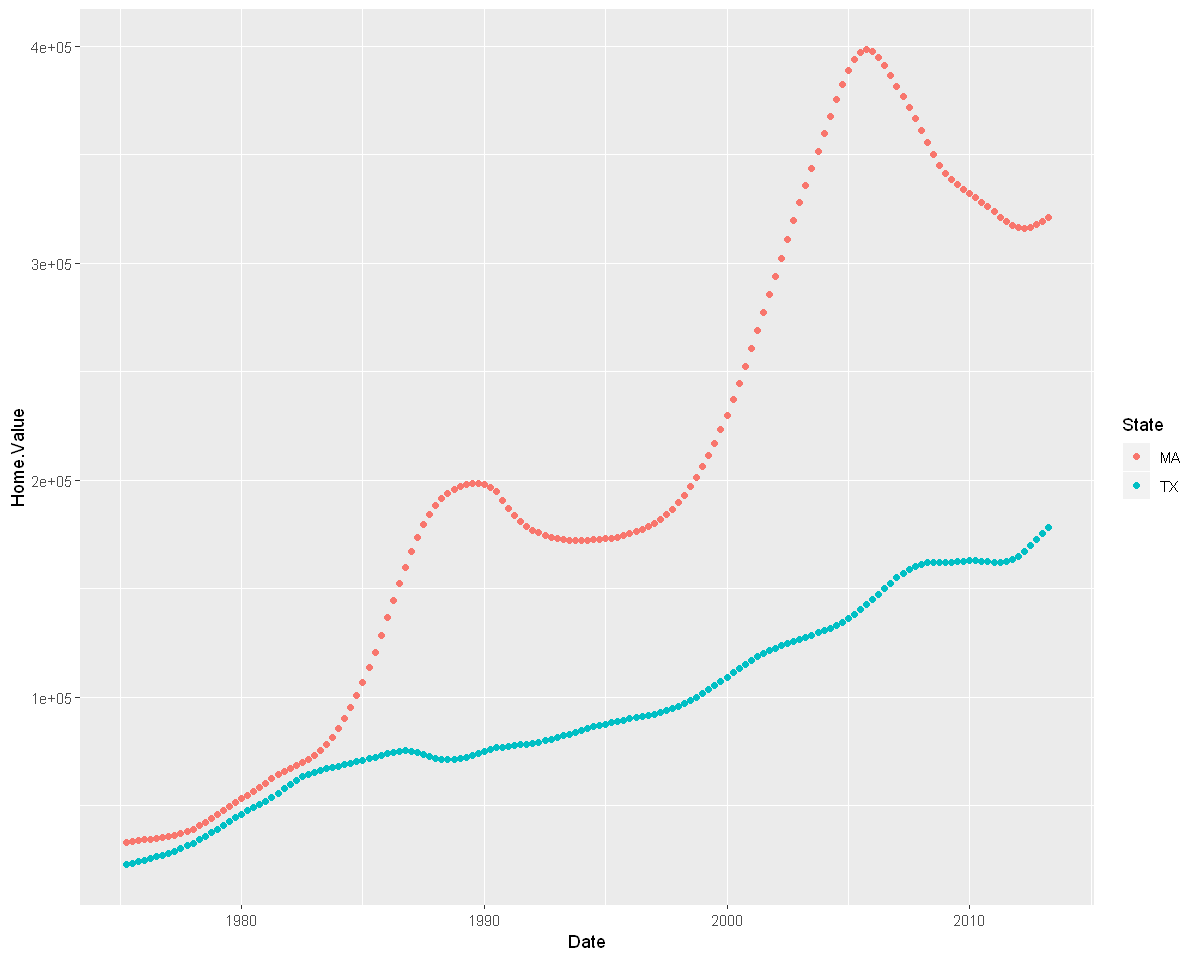

In [40]:
ggplot(filter(housing, State %in% c("MA", "TX")),
       aes(x=Date, y=Home.Value, color=State))+   #出现color 就代表分组  会涂成不同的颜色
  geom_point()

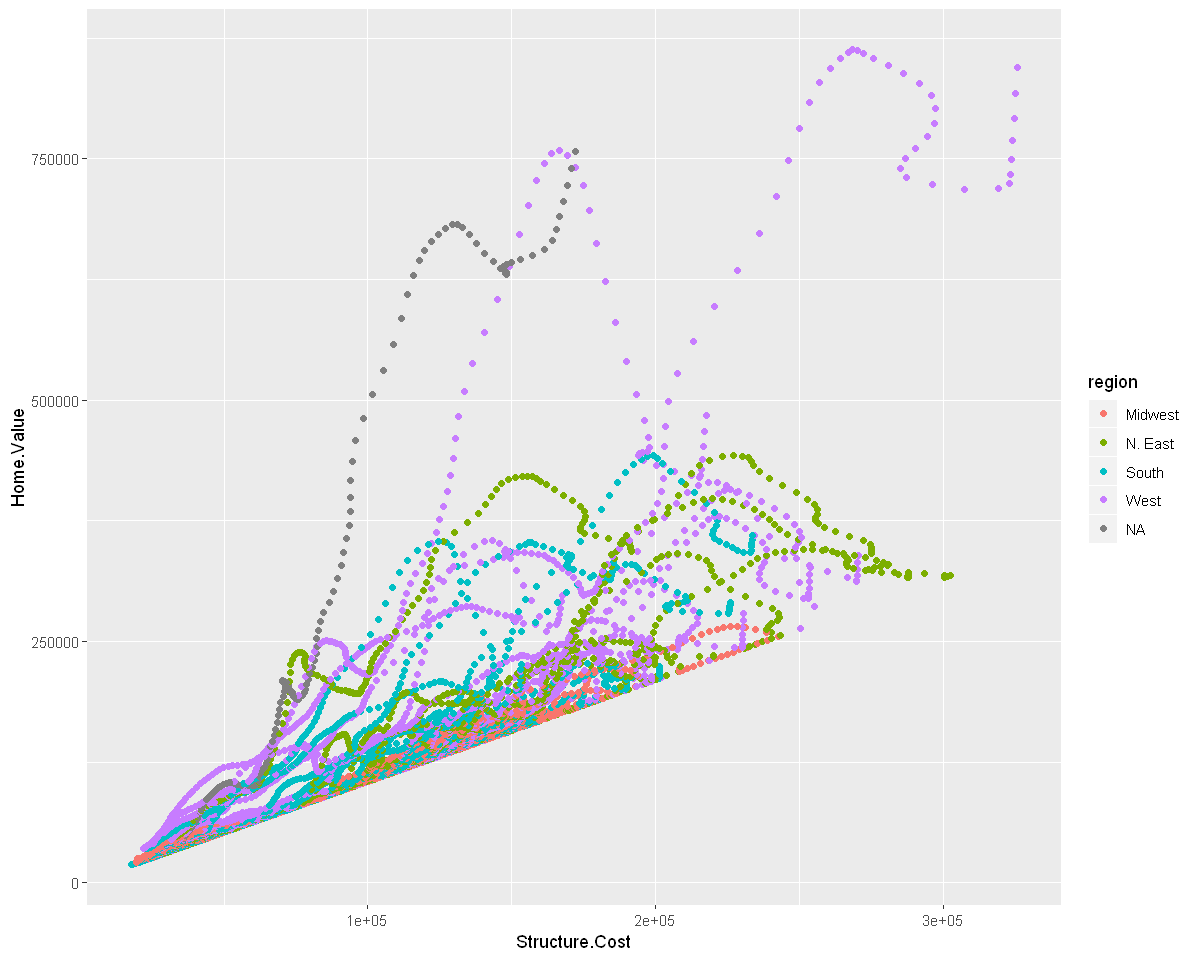

In [42]:
housing  %>% 
  arrange(Land.Value)  %>%  #先做了一个排序 然后 递进操作连接到ggplot2  
  ggplot(aes(x = Structure.Cost, y =  Home.Value, color = region)) +  #分别x y 轴进行命名
     geom_point() # 散点图

__Line plot__

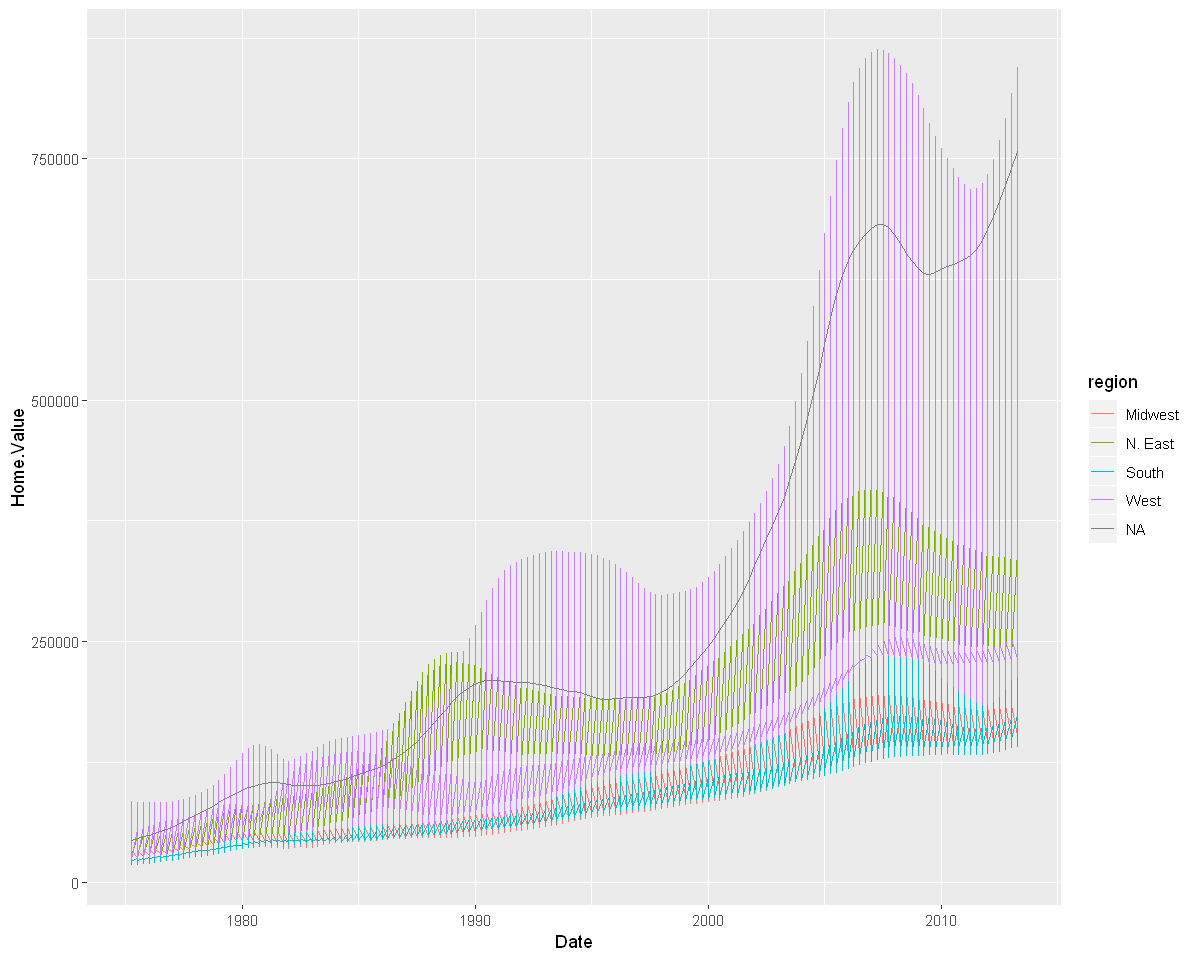

In [46]:
housing  %>% 
   ggplot(aes(x= Date, y = Home.Value, color = region)) +
      geom_line()    # 折线图

__Smooth curve__

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



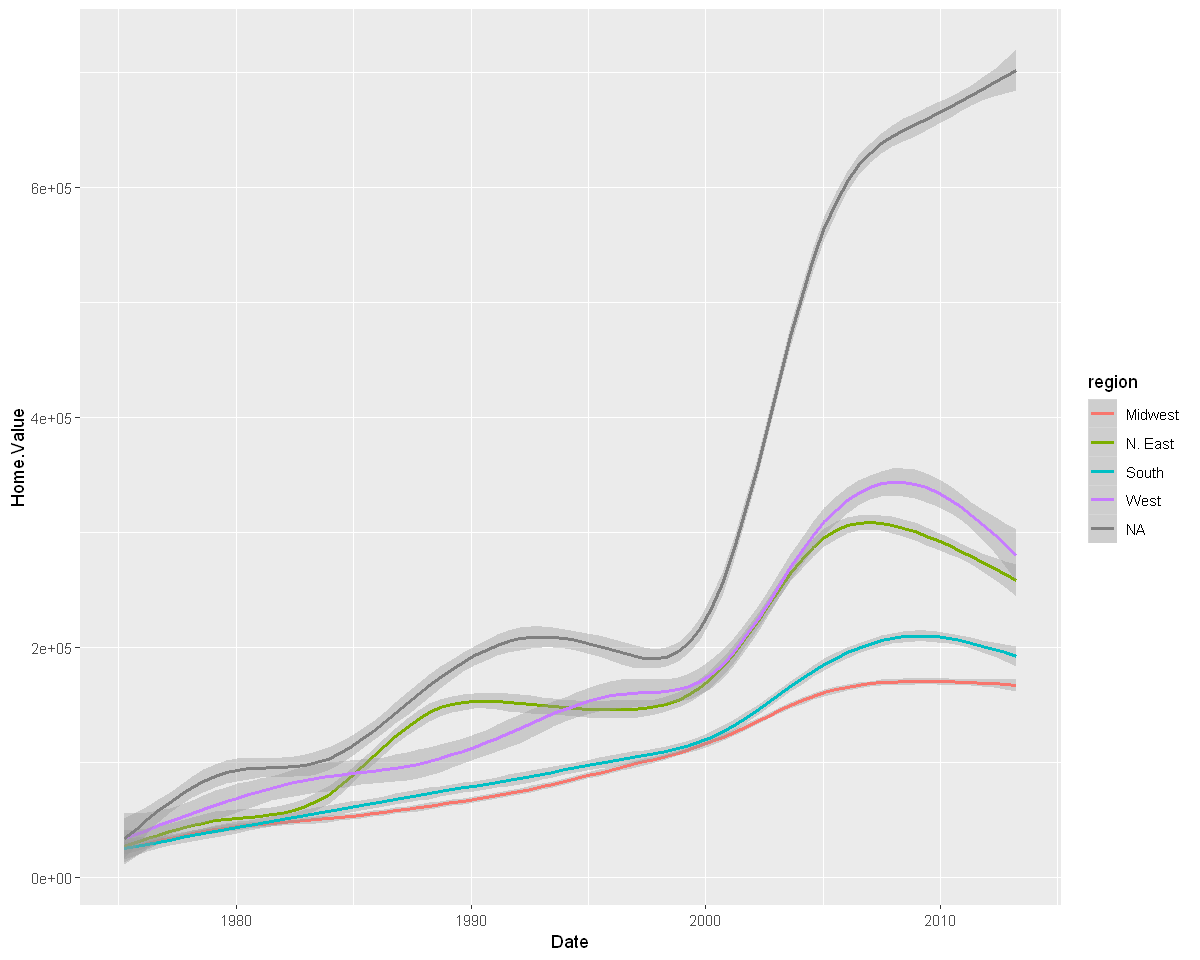

In [48]:
housing  %>% 
   ggplot(aes(x= Date, y = Home.Value, color = region)) +
      geom_smooth()  # 拟合

__Facet wrap__ (seperate plots)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



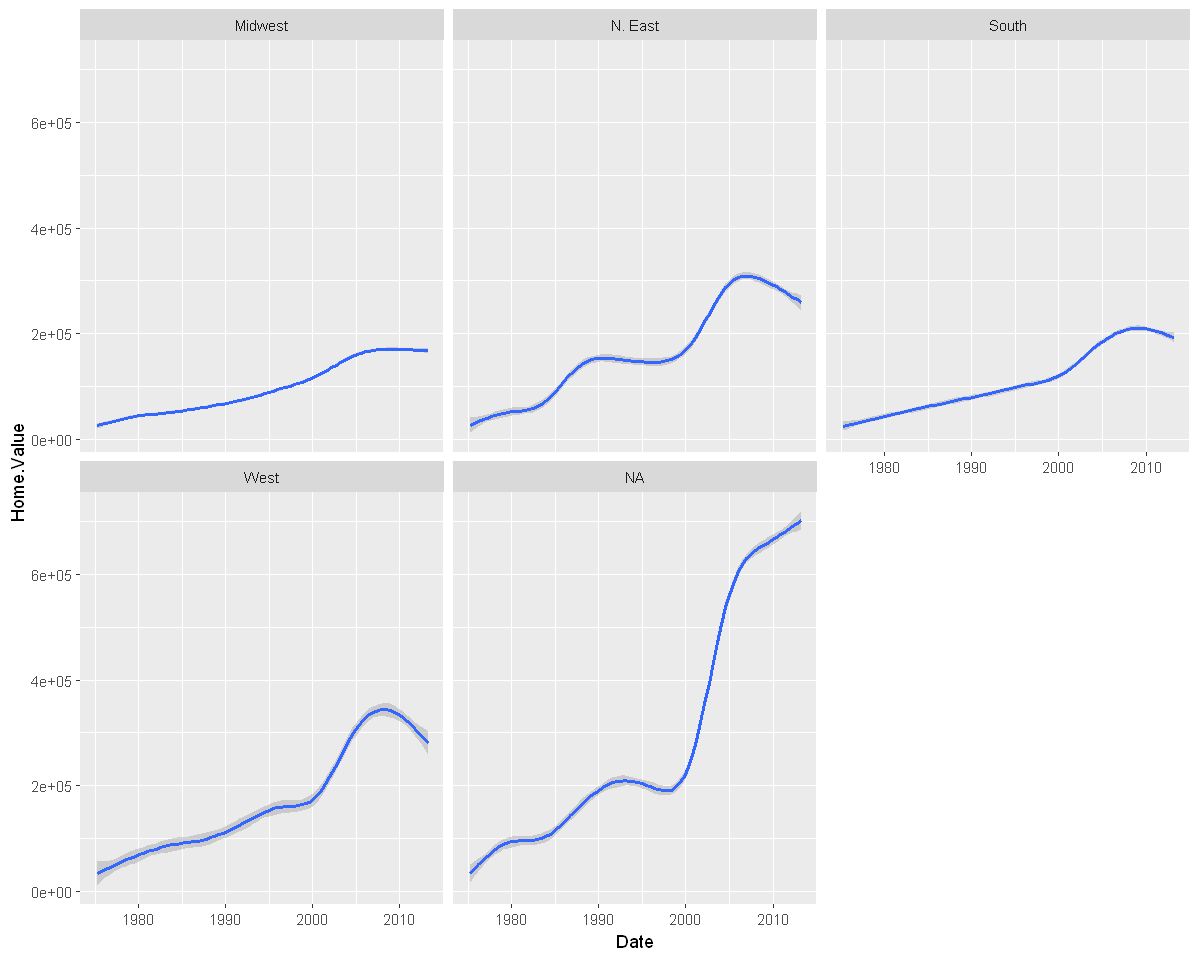

In [50]:
housing  %>% 
   ggplot(aes(x= Date, y = Home.Value)) +
      geom_smooth() +   # 拟合图
      facet_wrap(~region)  # 分成5个小图进行分组

## Project introduction

We will look at project sample notebooks via separate Rmarkdown/notebook